In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers

In [2]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print(tf.test.is_built_with_cuda)
# <function is_built_with_cuda at 0x7f4f5730fbf8>

print(tf.test.gpu_device_name())
# /device:GPU:0

print(tf.config.get_visible_devices())
# [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[]
<function is_built_with_cuda at 0x000001A2DA08C160>

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
img_array = cv2.imread("train\\0\\Training_3908.jpg")

In [4]:
img_array.shape #rgb

(48, 48, 3)

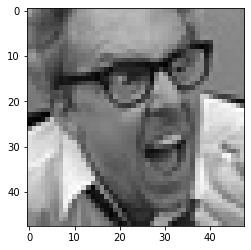

In [5]:
plt.imshow(img_array) #bgr

In [6]:
data_directory = "train\\" #training dataset

In [7]:
classes = ["0", "1", "2", "3", "4", "5", "6"] #list of classes. Exact name of folders

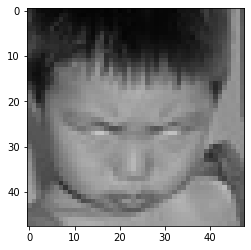

In [8]:
for category in classes:
    path = os.path.join(data_directory, category)
    for img in os.listdir(path): #returns iterable containing image file names which can be a list of strings. 
        img_array = cv2.imread(os.path.join(path,img))  #img contains the image file name
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

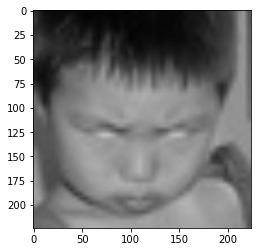

In [9]:
img_size = 224 #ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size) )
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape  #changing shape because we are using transfer learning and we are using deep learning classifier that takes
                 # 224x224

(224, 224, 3)

# Read All the Images into a list called training_data

In [11]:
training_data = []
def create_training_data():
    for category in classes:
        path = os.path.join(data_directory, category)
        class_num = classes.index(category) #0 1 2 label
        for img in os.listdir(path): #returns iterable containing image file names which can be a list of strings. 
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size) )
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
        

In [12]:
create_training_data()


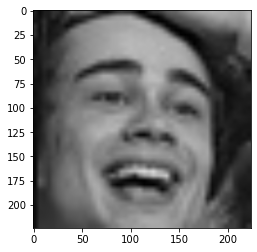

In [13]:
plt.imshow(cv2.cvtColor(training_data[10001][0], cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
print(len(training_data))

28709


In [15]:
import random
random.shuffle(training_data) #shuffling because the data is in sequence and deep learning shouldn't learn the sequence

In [16]:
X = []  #data or feature
Y = []  #label

for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)  #converting into 4 dimension. Mobilenet takes 4 dimension


In [17]:
X.shape

(28709, 224, 224, 3)

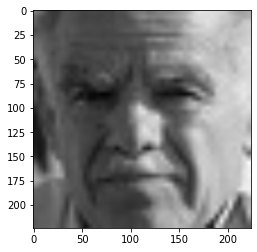

In [18]:
plt.imshow(cv2.cvtColor(training_data[0][0], cv2.COLOR_BGR2RGB)) #using the 2d list we had for storing images.
plt.show() 

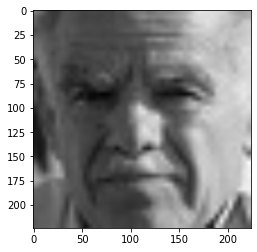

In [19]:
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))  #using numpy array
plt.show()

In [20]:
Y = np.array(Y)

In [24]:
Y.shape

(28709,)

In [55]:
# X = X/255.0

In [25]:
X.shape

(28709, 224, 224, 3)

# Deep Learning Model for training - Transfer Learning

In [26]:
model = tf.keras.applications.MobileNetV2() #pretrained model

In [27]:
model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# Transfer Learning

In [28]:
base_input = model.layers[0].input #taking the first layer

In [29]:
base_output = model.layers[-2].output #taking (outputs of ) only the second last layer

In [30]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [31]:
final_output = layers.Dense(128)(base_output)  #adding a new layer after the output of global pooling layer
                                               #base_output is taken from MobileNetV2. I am attaching a new layer to the base_output layer. 
                                               #base_input -> base_output -> 128 nodes vayeko layer (final_output)

final_output = layers.Activation('relu')(final_output) #activation function
                                                       #base_input -> base_output -> 128 nodes vayeko layer (final_output)

final_output = layers.Dense(64)(final_output)  #Look here, you passed the layer (final_output) as an argument. You attached previous layers with 64 nodes vayeko layer
                                               #  and called that 64 nodes vayeko layer lai final_output because you are assigning there. 
                                               # base_input -> base_output -> 128 nodes vayeko layer -> 64 nodes vayeko layer (final_output) 

final_output = layers.Activation('relu')(final_output)

final_output = layers.Dense(7, activation = 'softmax')(final_output) #classification layer
                                                                    #again you passed the final_output(64 nodes vayeko layer ) as a parameter
                                                                    # The classifiction layer gets attached to the previous layers. 

In [32]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [33]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [34]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [35]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [36]:
new_model.fit(X,Y, epochs = 25)  #for training. 

Epoch 1/25
898/898 [==============================] - 2150s 2s/step - loss: 1.2574 - accuracy: 0.5265
Epoch 2/25
898/898 [==============================] - 2155s 2s/step - loss: 1.0940 - accuracy: 0.5902
Epoch 3/25
898/898 [==============================] - 2128s 2s/step - loss: 1.0066 - accuracy: 0.6227
Epoch 4/25
898/898 [==============================] - 2146s 2s/step - loss: 0.9471 - accuracy: 0.6464
Epoch 5/25
898/898 [==============================] - 2128s 2s/step - loss: 0.8959 - accuracy: 0.6686
Epoch 6/25
898/898 [==============================] - 2140s 2s/step - loss: 0.8404 - accuracy: 0.6874
Epoch 7/25
898/898 [==============================] - 2094s 2s/step - loss: 0.7894 - accuracy: 0.7067
Epoch 8/25
898/898 [==============================] - 2089s 2s/step - loss: 0.7442 - accuracy: 0.7278
Epoch 9/25
898/898 [==============================] - 2170s 2s/step - loss: 0.6895 - accuracy: 0.7430
Epoch 10/25
898/898 [==============================] - 2047s 2s/step - loss: 0.634

In [56]:
new_model.save('ok_model_95p07.h5')  #saving the learned parameters after the training

In [39]:
#new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [34]:
# new_model = tf.keras.models.load_model('Final_model_95p07.h5')  #loading the trained model

In [40]:
frame = cv2.imread("happy_child.jpg")

In [41]:
frame.shape

(802, 1424, 3)

In [42]:
#we need face detection algorithm

In [43]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [44]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [45]:
gray.shape

(802, 1424)

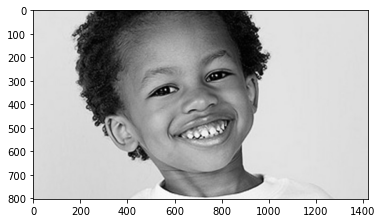

In [46]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [47]:
faces = faceCascade.detectMultiScale(gray, 1.3,5)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2) #BGR
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

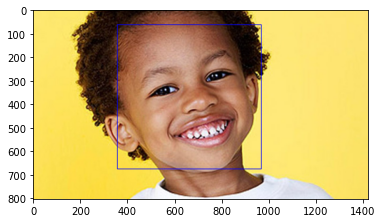

In [48]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

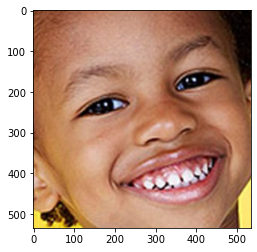

In [49]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [50]:
final_image = cv2.resize(face_roi, (224,224))  ##224 x 224 resizing
final_image = np.expand_dims(final_image, axis = 0) #need fourth dimension



In [51]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 5s 5s/step


In [52]:
Predictions[0]

array([1.34950415e-08, 1.84510840e-09, 2.02053574e-08, 9.99997616e-01,
       9.10929259e-07, 7.35436023e-09, 1.48644222e-06], dtype=float32)

In [53]:
np.argmax(Predictions)  #3 is happy

3

In [54]:


cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")


while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    

    faces = faceCascade.detectMultiScale(gray, 1.3,5)
      

    # Draw a rectangle around the faces
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2) #BGR
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
    final_image = cv2.resize(face_roi, (224,224))  ##224 x 224 resizing
    final_image = np.expand_dims(final_image, axis = 0) #need fourth dimension
    
    font = cv2.FONT_HERSHEY_COMPLEX
    Predictions = new_model.predict(final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions) ==0):
       status = "Angry"
       x1,y1,w1,h1 = 0,0,175,75 #black rectangle
       cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
       cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
       cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0, 255))
    elif(np.argmax(Predictions) ==1):
       status = "Disgust"
       x1,y1,w1,h1 = 0,0,175,75 #black rectangle
       cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
       cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
       cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0, 255))
       
    elif(np.argmax(Predictions) ==2):
       status = "Fear"
       x1,y1,w1,h1 = 0,0,175,75 #black rectangle
       cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
       cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
       cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0, 255))
       
    elif(np.argmax(Predictions) ==3):
       status = "Happy"
       x1,y1,w1,h1 = 0,0,175,75 #black rectangle
       cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
       cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
       cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0, 255))
       
    elif(np.argmax(Predictions) ==4):
       status = "Neutral"
       x1,y1,w1,h1 = 0,0,175,75 #black rectangle
       cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
       cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
       cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0, 255))
         
    elif(np.argmax(Predictions) ==5):
       status = "Sad"
       x1,y1,w1,h1 = 0,0,175,75 #black rectangle
       cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
       cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
       cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0, 255))
    else:
       status = "Surprise"
       x1,y1,w1,h1 = 0,0,175,75 #black rectangle
       cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
       cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
       cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0, 255))
      
    cv2.imshow('Face Emotion Recognition', frame)
    
    if(cv2.waitKey(2) & 0xFF == ord('q')):
         break
    
cap.release()
cv2.destroyAllWindows()
          

1/1 [==============================] - 0s 65ms/step
Face not detected
1/1 [==============================] - 0s 53ms/step
